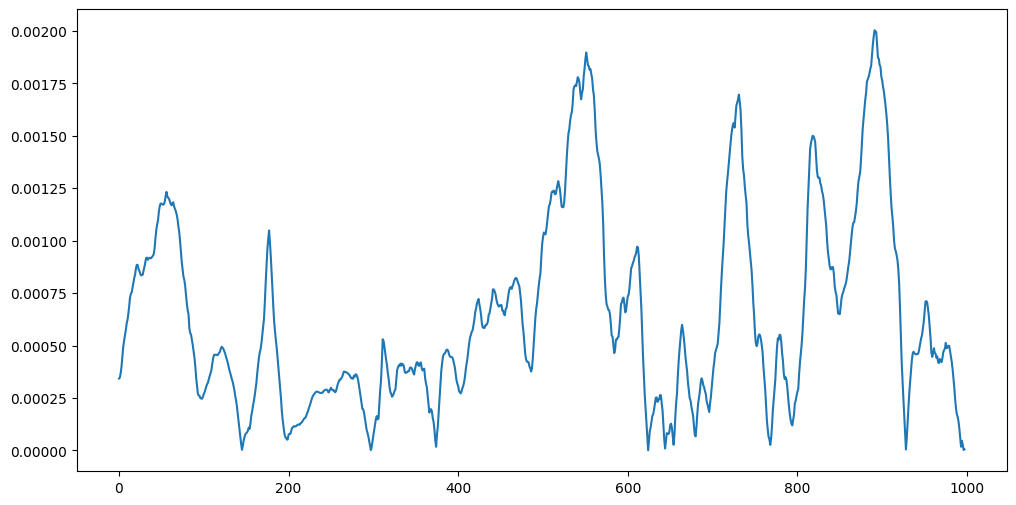

In [8]:
from Functions import exponential_moving_average, initialization_check, price_data_frame
import MetaTrader5 as meta
from matplotlib import pyplot as plt

bars = 1000
initialization_check()
dataframe = price_data_frame('EURUSDm', meta.TIMEFRAME_M1, bars)
exponential_moving_average(dataframe)
fast = []
slow = []
diff = []
for i in reversed(range(bars - 1)):
    fast.append(dataframe.at[i, 'Fast_EMA'])
    slow.append(dataframe.at[i, 'Slow_EMA'])

for i in range(len(fast) - 1):
    diff.append(abs(fast[i] - slow[i]))

plt.figure(figsize=(12,6))
plt.plot(diff)
plt.show()

In [11]:
from Functions import exponential_moving_average, \
    initialization_check, price_data_frame, \
        store_levels, horizontal_line_values, plotter
import MetaTrader5 as meta
from matplotlib import pyplot as plt

bars = 1000
initialization_check()
dataframe = price_data_frame('EURUSDm', meta.TIMEFRAME_M1, bars)
exponential_moving_average(dataframe)
tuner = 0.0009
levels = store_levels(dataframe, tuner)
# levels = horizontal_line_values(levels)
plotter(levels, dataframe)
print(levels)

e:\Documents\Python Trading Robot\Functions.py:213: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(3, 0.96787), (54, 0.96918), (72, 0.96547), (85, 0.96411), (164, 0.96268), (440, 0.96105), (812, 0.95823)]
